In [89]:
from binsmooth import BinSmooth
import numpy as np

bin_edges = np.array([0, 10000, 15000, 25000, 35000, 50000, 75000, 100000, 150000, 200000, 660000])
counts = np.array([0, 51, 39, 55, 49, 70, 116, 108, 173, 120, 202, 17])
mean_estimate = 146162

bs = BinSmooth()
bs.fit(bin_edges, counts, m=mean_estimate)

/Users/jerryli/miniconda3/envs/vis/lib/python3.12/site-packages/scipy/optimize/_optimize.py:807: RuntimeWarning: overflow encountered in multiply
  sim = np.where(msk, 2*upper_bound - sim, sim)


In [112]:
xs = np.linspace(0, 1000000, 201)
ys = bs.cdf(xs)
dx = xs[1] - xs[0]
ys2 = np.diff(ys, prepend=[0]) / dx
ys2

array([0.00000000e+00, 4.34642857e-06, 5.85357143e-06, 7.80000000e-06,
       5.84870512e-06, 5.15129488e-06, 4.99860467e-06, 4.80139533e-06,
       4.72343868e-06, 4.64236738e-06, 4.63419394e-06, 4.67573444e-06,
       4.69418109e-06, 4.67631387e-06, 4.62213278e-06, 4.53163782e-06,
       4.48750307e-06, 4.46986327e-06, 4.38611174e-06, 4.23624847e-06,
       4.02027345e-06, 3.86482977e-06, 3.80616706e-06, 3.73576705e-06,
       3.65362974e-06, 3.55975514e-06, 3.45414324e-06, 3.33679404e-06,
       3.20770755e-06, 3.06688375e-06, 2.91432267e-06, 2.88565217e-06,
       2.94650361e-06, 2.94406473e-06, 2.87833556e-06, 2.74931609e-06,
       2.55700632e-06, 2.30140624e-06, 1.98251587e-06, 1.60033519e-06,
       1.15486421e-06, 9.04401489e-07, 8.91206533e-07, 8.78110551e-07,
       8.65113543e-07, 8.52215509e-07, 8.39416448e-07, 8.26716362e-07,
       8.14115250e-07, 8.01613111e-07, 7.89209947e-07, 7.76905756e-07,
       7.64700540e-07, 7.52594297e-07, 7.40587029e-07, 7.28678734e-07,
      

In [113]:
ys

array([0.        , 0.02173214, 0.051     , 0.09      , 0.11924353,
       0.145     , 0.16999302, 0.194     , 0.21761719, 0.24082903,
       0.264     , 0.28737867, 0.31084958, 0.33423115, 0.35734181,
       0.38      , 0.40243752, 0.42478683, 0.44671739, 0.46789863,
       0.488     , 0.50732415, 0.52635498, 0.54503382, 0.56330197,
       0.58110074, 0.59837146, 0.61505543, 0.63109397, 0.64642839,
       0.661     , 0.67542826, 0.69016078, 0.7048811 , 0.71927278,
       0.73301936, 0.74580439, 0.75731142, 0.767224  , 0.77522568,
       0.781     , 0.78552201, 0.78997804, 0.79436859, 0.79869416,
       0.80295524, 0.80715232, 0.8112859 , 0.81535648, 0.81936454,
       0.82331059, 0.82719512, 0.83101863, 0.8347816 , 0.83848453,
       0.84212793, 0.84571227, 0.84923807, 0.85270581, 0.85611598,
       0.85946909, 0.86276563, 0.86600609, 0.86919097, 0.87232076,
       0.87539595, 0.87841705, 0.88138455, 0.88429893, 0.88716071,
       0.88997037, 0.8927284 , 0.8954353 , 0.89809157, 0.90069

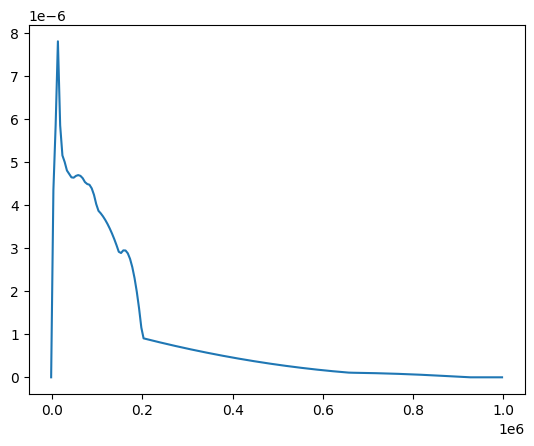

In [114]:
import matplotlib.pyplot as plt
# from scipy.interpolate import make_interp_spline, BSpline

# spl = make_interp_spline(T, power, k=3)
# smooth_ys2 = spl(ys2)
plt.plot(xs - dx/2, ys2)

/var/folders/0r/gs0ch5nn3fzcwqj_9c2f99v40000gn/T/ipykernel_33231/1803096244.py:1: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


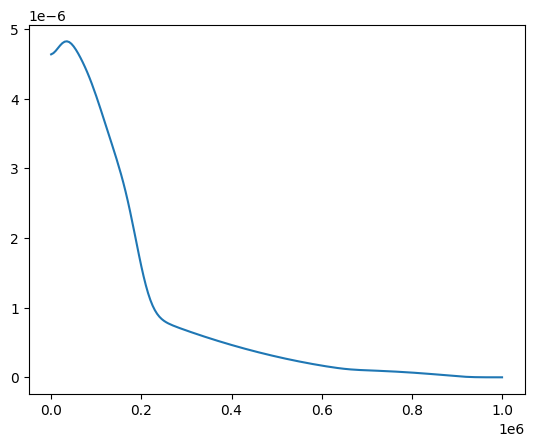

In [115]:
from scipy.ndimage.filters import gaussian_filter1d

ys3 = gaussian_filter1d(ys2, sigma=5)
plt.plot(xs, ys3)

In [116]:
import pandas as pd

df = pd.DataFrame({'income': xs, 'pdf': ys3, 'cdf': ys})
df.to_csv('income_dist.csv')
# pd.to_csv

In [117]:
ys

array([0.        , 0.02173214, 0.051     , 0.09      , 0.11924353,
       0.145     , 0.16999302, 0.194     , 0.21761719, 0.24082903,
       0.264     , 0.28737867, 0.31084958, 0.33423115, 0.35734181,
       0.38      , 0.40243752, 0.42478683, 0.44671739, 0.46789863,
       0.488     , 0.50732415, 0.52635498, 0.54503382, 0.56330197,
       0.58110074, 0.59837146, 0.61505543, 0.63109397, 0.64642839,
       0.661     , 0.67542826, 0.69016078, 0.7048811 , 0.71927278,
       0.73301936, 0.74580439, 0.75731142, 0.767224  , 0.77522568,
       0.781     , 0.78552201, 0.78997804, 0.79436859, 0.79869416,
       0.80295524, 0.80715232, 0.8112859 , 0.81535648, 0.81936454,
       0.82331059, 0.82719512, 0.83101863, 0.8347816 , 0.83848453,
       0.84212793, 0.84571227, 0.84923807, 0.85270581, 0.85611598,
       0.85946909, 0.86276563, 0.86600609, 0.86919097, 0.87232076,
       0.87539595, 0.87841705, 0.88138455, 0.88429893, 0.88716071,
       0.88997037, 0.8927284 , 0.8954353 , 0.89809157, 0.90069

In [123]:
house_df = pd.read_csv("../assess_lat_long.csv")
house_df = house_df[(house_df['YR_BUILT'] <= 2022) & (house_df['YR_BUILT'] >= 2000)]
house_df

,Unnamed: 0,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,LU,BLDG_TYPE,OWN_OCC,TOTAL_VALUE,YR_BUILT,lon,lat
47,51,100041000,224.0,PRINCETON ST,1,EAST BOSTON,2128.0,CD,FS - Free Standing,Y,606100,2021,-71.031632,42.379377
48,52,100041000,224.0,PRINCETON ST,2,EAST BOSTON,2128.0,CD,FS - Free Standing,Y,664000,2021,-71.031632,42.379377
49,53,100041000,224.0,PRINCETON ST,3,EAST BOSTON,2128.0,CD,FS - Free Standing,Y,679900,2021,-71.031632,42.379377
50,54,100041000,224.0,PRINCETON ST,4,EAST BOSTON,2128.0,CD,FS - Free Standing,Y,779800,2021,-71.031632,42.379377
115,150,100134000,438.0,Saratoga ST,NaN,EAST BOSTON,2128.0,R3,DK - Decker,N,1297500,2007,-71.028749,42.379689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136924,181379,2205460010,9.0,EULITA TE,9,BRIGHTON,2135.0,CD,FS - Free Standing,Y,803100,2006,-71.152603,42.346353
137071,181558,2205525000,128.0,Kenrick ST,1,BRIGHTON,2135.0,CD,FS - Free Standing,Y,685900,2007,-71.168370,42.346410
137072,181559,2205525000,128.0,Kenrick ST,2,BRIGHTON,2135.0,CD,FS - Free Standing,N,739700,2007,-71.168370,42.346410
137073,181560,2205525000,128.0,Kenrick ST,3,BRIGHTON,2135.0,CD,FS - Free Standing,N,671400,2007,-71.168370,42.346410


In [126]:
from scipy.stats import gaussian_kde

kernel = gaussian_kde(house_df['TOTAL_VALUE'])

In [149]:
hxs = np.linspace(0, 5000000, 501)
hys = kernel(hxs)

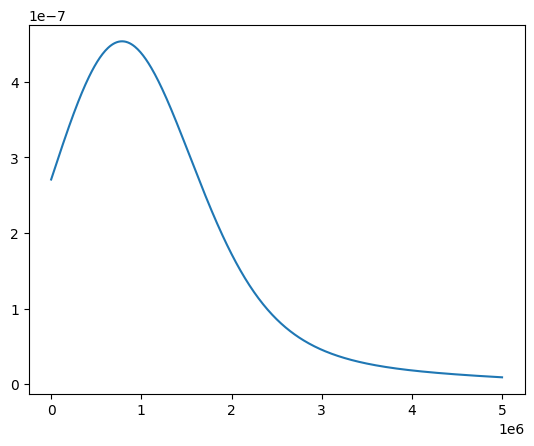

In [150]:
plt.plot(hxs, hys)

In [151]:
hcdf = [sum(house_df['TOTAL_VALUE'] < thresh) / len(house_df) for thresh in hxs]

In [152]:
hcdf

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00015142337976983646,
 0.0005047445992327882,
 0.0009590147385422976,
 0.0010599636583888553,
 0.0017666060973147587,
 0.0027256208358570565,
 0.0029779931354734506,
 0.003937007874015748,
 0.007167373309105592,
 0.009186351706036745,
 0.01155865132243085,
 0.014789016757520694,
 0.01968503937007874,
 0.022107813446396122,
 0.02448011306279023,
 0.02866949323642237,
 0.030537048253583686,
 0.03280839895013123,
 0.037956793862305674,
 0.04300423985463356,
 0.04714314556834242,
 0.0524429638602867,
 0.056682818493842116,
 0.061780738946093275,
 0.06556632344033919,
 0.07061376943266708,
 0.07717544922269332,
 0.08186957399555825,
 0.08868362608520089,
 0.09433676559660811,
 0.10145366444579043,
 0.10831819099535635,
 0.11851403189985867,
 0.12537855844942458,
 0.1334544720371492,
 0.1415303856248738,
 0.1501615182717545,
 0.15980214011710075,
 0.1710579446799919,
 0.1806480920654149,
 0.19150010094891984,
 0.20285

In [153]:
dx = hxs[1] - hxs[0]
hys2 = np.diff(hcdf, prepend=[0]) / dx
hys2

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.51423380e-08, 3.53321219e-08, 4.54270139e-08, 1.00948920e-08,
       7.06642439e-08, 9.59014739e-08, 2.52372300e-08, 9.59014739e-08,
       3.23036544e-07, 2.01897840e-07, 2.37229962e-07, 3.23036544e-07,
       4.89602261e-07, 2.42277408e-07, 2.37229962e-07, 4.18938017e-07,
       1.86755502e-07, 2.27135070e-07, 5.14839491e-07, 5.04744599e-07,
       4.13890571e-07, 5.29981829e-07, 4.23985463e-07, 5.09792045e-07,
       3.78558449e-07, 5.04744599e-07, 6.56167979e-07, 4.69412477e-07,
       6.81405209e-07, 5.65313951e-07, 7.11689885e-07, 6.86452655e-07,
       1.01958409e-06, 6.86452655e-07, 8.07591359e-07, 8.07591359e-07,
       8.63113265e-07, 9.64062185e-07, 1.12558046e-06, 9.59014739e-07,
       1.08520089e-06, 1.13567535e-06, 8.93397941e-07, 9.08540279e-07,
      

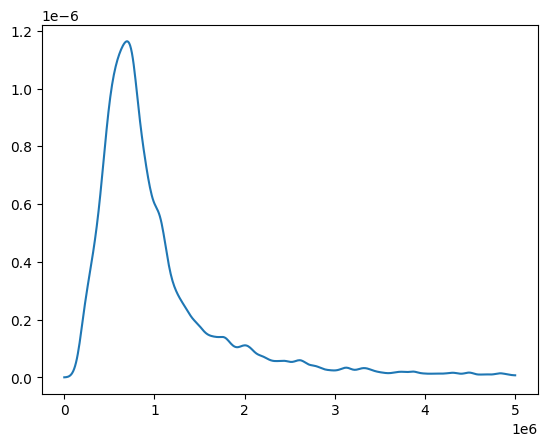

In [156]:
hys3 = gaussian_filter1d(hys2, sigma=5)
plt.plot(hxs, hys3)

In [160]:
hdf = pd.DataFrame({'house_price': hxs, 'pdf': hys3, 'cdf': hcdf})
hdf

,house_price,pdf,cdf
0,0.0,4.946895e-10,0.000000
1,10000.0,6.500412e-10,0.000000
2,20000.0,9.847189e-10,0.000000
3,30000.0,1.550867e-09,0.000000
4,40000.0,2.433809e-09,0.000000
...,...,...,...
496,4960000.0,8.374711e-09,0.980769
497,4970000.0,8.023351e-09,0.980820
498,4980000.0,7.752020e-09,0.980870
499,4990000.0,7.568508e-09,0.980921


In [161]:
hdf.to_csv("house_dist.csv")